In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pyvista
import ufl
import time
from mpi4py import MPI
from petsc4py import PETSc
# import dolfinx
from dolfinx import fem, mesh, plot, nls, log, io
from dolfinx import cpp as _cpp
import meshio
import os
import seaborn as sns
import json
%load_ext autoreload
%autoreload 2

from utils import *
from model import *

vertex = [6,6,200]
num_nodes = [5,5,50]
domain = mesh.create_box(MPI.COMM_WORLD, [[0.0, 0.0, 0.0], vertex], 
                         num_nodes, mesh.CellType.tetrahedron) 

results_folder = r"../../results-data/"
exp_folder = "slab_test_infinite"

model = PerfusionGasExchangeModel(mesh_path=None,
                                  results_path=results_folder,
                                  exp_path=exp_folder,
                                  params=None)

max_dims = [76.07255, 74.9075,  74.99651]
min_dims = [-1.12887,  0.07919,  0.09616]

model.Setup(domain, max_dims = max_dims, min_dims = min_dims, imported=True)
model.parameter_setup()

max_dims = [76.07255, 74.9075, 74.99651]
min_dims = [-1.12887, 0.07919, 0.09616]


In [3]:
### Single loop test (works!)

# model.p_params["uin"] = 800/3
# p, u = model.Perfusion(domain, plot=False, save=True)

# p_val = 0
# guess = model.GasExchange(domain, guess=None, save=True, 
#                           plot=False, p_val = p_val, 
#                           postprocess=False, plot_lines=False)
# N = 4
# for i in range(N):
#     p_val += 1/N
#     if i != N-1:
#         guess = model.GasExchange(domain, guess=guess, save=False, 
#                                   plot=False, p_val = p_val, 
#                                   postprocess=False, plot_lines=False)
#     else:
#         guess = model.GasExchange(domain, guess=guess, save=True, 
#                                   plot=False, p_val = p_val, 
#                                   postprocess=True, plot_lines=True)

In [4]:
p_O2_zurita = []
z_O2_zurita = []
with open("./csv-results/p_O2_zurita.csv", "r") as file:
    i = 0
    for row in file:
        if i != 0:
            p_O2_zurita.append(row.split(",")[0])
            z_O2_zurita.append(row.split(",")[1])
        i += 1

p_O2_zurita = np.asarray(p_O2_zurita, float)
z_O2_zurita = np.asarray(z_O2_zurita, float)/(800/3)

p_CO2_zurita = []
z_CO2_zurita = []
with open("./csv-results/p_CO2_zurita.csv", "r") as file:
    i = 0
    for row in file:
        if i != 0:
            p_CO2_zurita.append(row.split(",")[0])
            z_CO2_zurita.append(row.split(",")[1])
        i += 1

p_CO2_zurita = np.asarray(p_CO2_zurita, float)
z_CO2_zurita = np.asarray(z_CO2_zurita, float)/(800/3)

c_HbO2_zurita = []
z_HbO2_zurita = []
with open("./csv-results/c_HbO2_zurita.csv", "r") as file:
    i = 0
    for row in file:
        if i != 0:
            c_HbO2_zurita.append(row.split(",")[0])
            z_HbO2_zurita.append(row.split(",")[1])
        i += 1

c_HbO2_zurita = np.asarray(c_HbO2_zurita, float)
z_HbO2_zurita = np.asarray(z_HbO2_zurita, float)/(800/3)

c_HbCO2_zurita = []
z_HbCO2_zurita = []
with open("./csv-results/c_HbCO2_zurita.csv", "r") as file:
    i = 0
    for row in file:
        if i != 0:
            c_HbCO2_zurita.append(row.split(",")[0])
            z_HbCO2_zurita.append(row.split(",")[1])
        i += 1

c_HbCO2_zurita = np.asarray(c_HbCO2_zurita, float)
z_HbCO2_zurita = np.asarray(z_HbCO2_zurita, float)/(800/3)


In [5]:
p_O2_herrera = []
z_O2_herrera = []
with open("./csv-results/p_O2_herrera.csv", "r") as file:
    i = 0
    for row in file:
        if i != 0:
            p_O2_herrera.append(row.split(",")[0])
            z_O2_herrera.append(row.split(",")[3])
        i += 1

p_O2_herrera = np.asarray(p_O2_herrera, float)
z_O2_herrera = np.asarray(z_O2_herrera, float)/(800/3)

p_CO2_herrera = []
z_CO2_herrera = []
with open("./csv-results/p_CO2_herrera.csv", "r") as file:
    i = 0
    for row in file:
        if i != 0:
            p_CO2_herrera.append(row.split(",")[0])
            z_CO2_herrera.append(row.split(",")[3])
        i += 1

p_CO2_herrera = np.asarray(p_CO2_herrera, float)
z_CO2_herrera = np.asarray(z_CO2_herrera, float)/(800/3)

c_HbO2_herrera = []
z_HbO2_herrera = []
with open("./csv-results/s_HbO2_herrera.csv", "r") as file:
    i = 0
    for row in file:
        if i != 0:
            c_HbO2_herrera.append(row.split(",")[0])
            z_HbO2_herrera.append(row.split(",")[3])
        i += 1

c_HbO2_herrera = model.dash_params["Hb_bl"]*np.asarray(c_HbO2_herrera, float)
z_HbO2_herrera = np.asarray(z_HbO2_herrera, float)/(800/3)

c_HbCO2_herrera = []
z_HbCO2_herrera = []
with open("./csv-results/s_HbCO2_herrera.csv", "r") as file:
    i = 0
    for row in file:
        if i != 0:
            c_HbCO2_herrera.append(row.split(",")[0])
            z_HbCO2_herrera.append(row.split(",")[3])
        i += 1

c_HbCO2_herrera = model.dash_params["Hb_bl"]*np.asarray(c_HbCO2_herrera, float)
z_HbCO2_herrera = np.asarray(z_HbCO2_herrera, float)/(800/3)


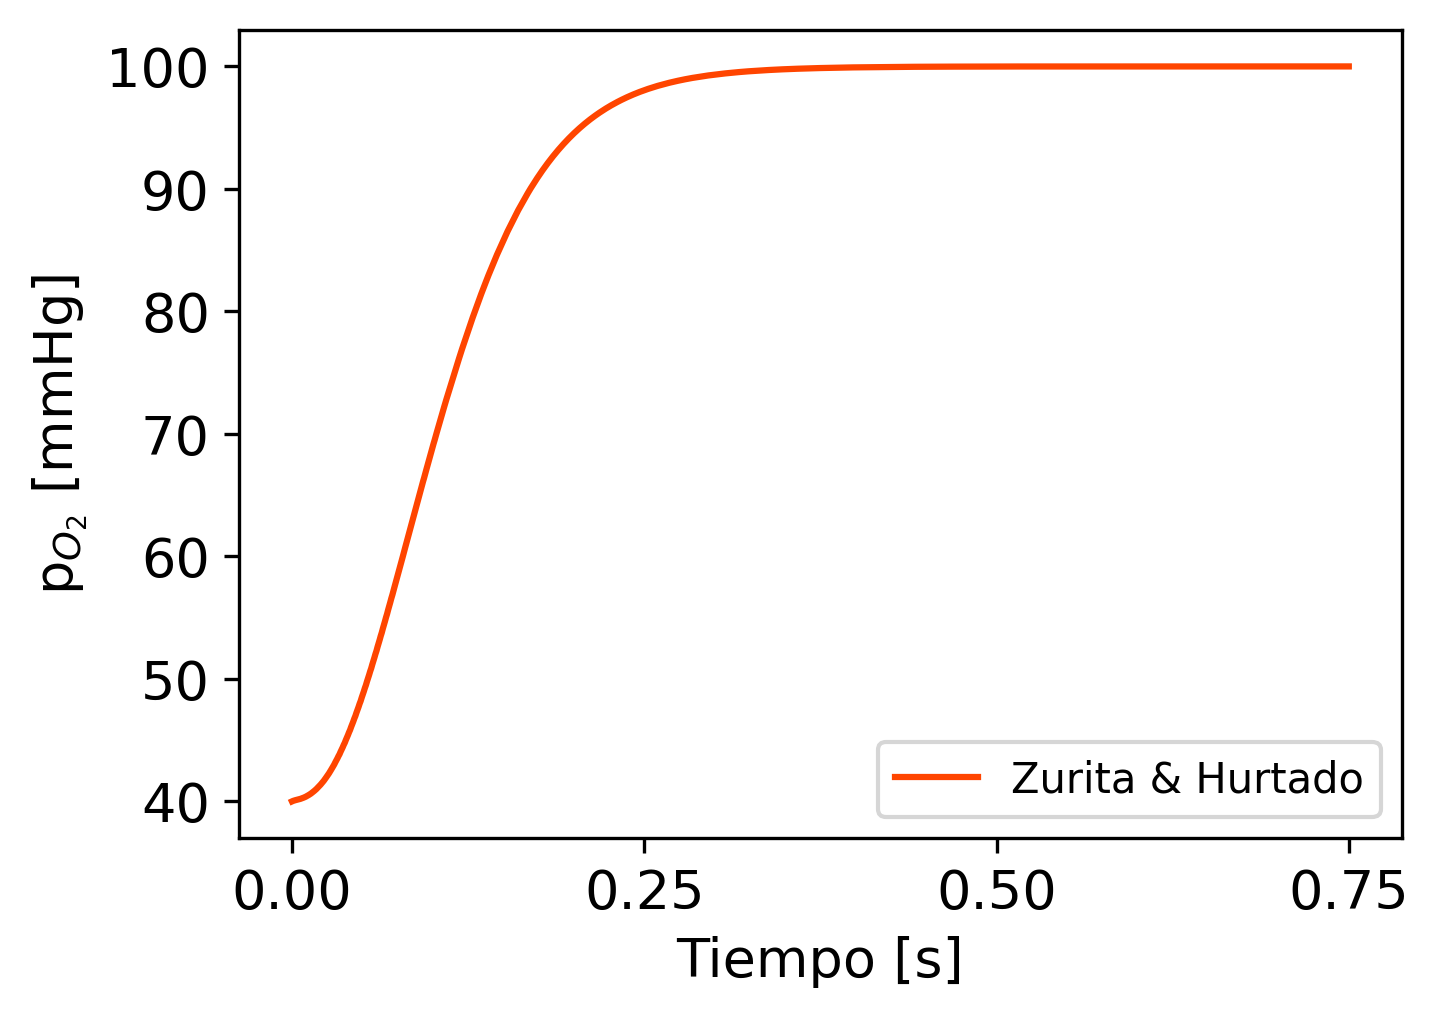

In [6]:
fig, ax = plt.subplots(figsize=(5,3.5), dpi=300)
ax.plot(z_O2_zurita, p_O2_zurita, color='orangered', label='Zurita & Hurtado')
# ax.plot(np.arange(200)/(800/3), model.results_dict["p_O2"]['3.0'], color='dodgerblue', label='Este modelo')
ax.set_xlabel("Tiempo [s]", size=13)
ax.set_ylabel(r"p$_{O_2}$ [mmHg]", size=13)
ax.tick_params(axis='both', labelsize=13)
ax.set_xticks(np.linspace(0.0, 0.75, 4))
ax.legend()
plt.show()

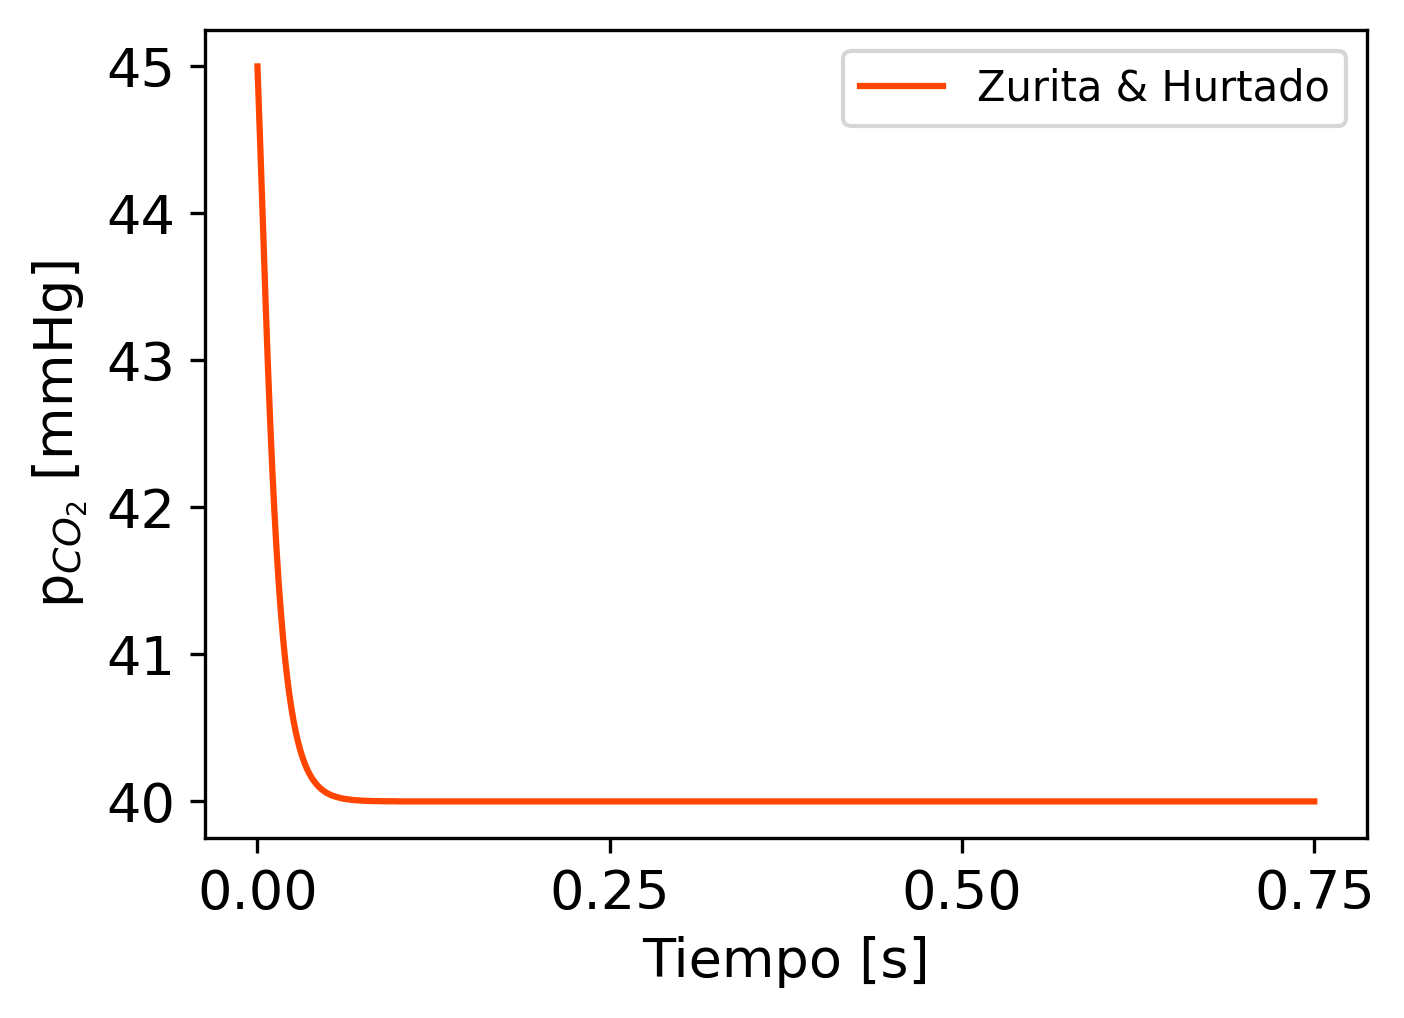

In [7]:
fig, ax = plt.subplots(figsize=(5,3.5), dpi=300)
ax.plot(z_CO2_zurita, p_CO2_zurita, color='orangered', label='Zurita & Hurtado')
# ax.plot(model.z/(80), model.results_dict["p_CO2"]['4.0'], color='dodgerblue', label='Este modelo')
ax.set_xlabel("Tiempo [s]", size=13)
ax.set_ylabel(r"p$_{CO_2}$ [mmHg]", size=13)
ax.tick_params(axis='both', labelsize=13)
ax.set_xticks(np.linspace(0.0, 0.75, 4))
ax.legend()
plt.show()

In [8]:
# fig, ax = plt.subplots(figsize=(5,3.5), dpi=300)
# ax.plot(z_HbO2_zurita, c_HbO2_zurita, color='orangered', label='Zurita & Hurtado')
# ax.plot(model.z/(800/3), 4*model.dash_params["Hb_bl"]*model.results_dict["S_HbO2"]['3.0'], 
#         color='dodgerblue', label='Este modelo')
# ax.set_xlabel("Tiempo [s]", size=13)
# ax.set_ylabel(r"p$_{O_2}$ [mmHg]", size=13)
# ax.tick_params(axis='both', labelsize=13)
# ax.legend()
# plt.show()

In [9]:
### Slice averaging

p_O2_slice_avg_dilated = []
x_O2_slice_avg_dilated = []

with open(r"csv-results/p_O2_slice_avg_dilated.csv", "r") as file:
    i = 0
    for row in file: # Area, Points_0, Points_1, Points_2, slice_average
        if i != 0:
            p_O2_slice_avg_dilated.append(row.strip("\n").split(",")[4])
            x_O2_slice_avg_dilated.append(row.strip("\n").split(",")[1])
        i += 1

p_O2_slice_avg_dilated = np.array(p_O2_slice_avg_dilated, dtype=np.float64)
x_O2_slice_avg_dilated = np.array(x_O2_slice_avg_dilated, dtype=np.float64).round(2)



p_CO2_slice_avg_dilated = []
x_CO2_slice_avg_dilated = []

with open(r"csv-results/p_CO2_slice_avg_dilated.csv", "r") as file:
    i = 0
    for row in file: # Block Name,Area,Points_0,Points_1,Points_2,slice_average
        if i != 0:
            p_CO2_slice_avg_dilated.append(row.strip("\n").split(",")[5])
            x_CO2_slice_avg_dilated.append(row.strip("\n").split(",")[2])
        i += 1

p_CO2_slice_avg_dilated = np.array(p_CO2_slice_avg_dilated, dtype=np.float64)
x_CO2_slice_avg_dilated = np.array(x_CO2_slice_avg_dilated, dtype=np.float64).round(2)



##

p_O2_slice_avg_normal = []
x_O2_slice_avg_normal = []

with open(r"csv-results/p_O2_slice_avg_normal.csv", "r") as file:
    i = 0
    for row in file: # Area, Points_0, Points_1, Points_2, p_O2, slice_average
        if i != 0:
            p_O2_slice_avg_normal.append(row.strip("\n").split(",")[5])
            x_O2_slice_avg_normal.append(row.strip("\n").split(",")[1])
        i += 1

p_O2_slice_avg_normal = np.array(p_O2_slice_avg_normal, dtype=np.float64)
x_O2_slice_avg_normal = np.array(x_O2_slice_avg_normal, dtype=np.float64).round(2)



p_CO2_slice_avg_normal = []
x_CO2_slice_avg_normal = []

with open(r"csv-results/p_CO2_slice_avg_normal.csv", "r") as file:
    i = 0
    for row in file: # Area,Points_0,Points_1,Points_2,slice_average
        if i != 0:
            p_CO2_slice_avg_normal.append(row.strip("\n").split(",")[4])
            x_CO2_slice_avg_normal.append(row.strip("\n").split(",")[1])
        i += 1

p_CO2_slice_avg_normal = np.array(p_CO2_slice_avg_normal, dtype=np.float64)
x_CO2_slice_avg_normal = np.array(x_CO2_slice_avg_normal, dtype=np.float64).round(2)


##

p_O2_slice_avg_eroded = []
x_O2_slice_avg_eroded = []

with open(r"csv-results/p_O2_slice_avg_eroded.csv", "r") as file:
    i = 0
    for row in file: # Area, Points_0, Points_1, Points_2, p_O2, slice_average
        if i != 0:
            p_O2_slice_avg_eroded.append(row.strip("\n").split(",")[4])
            x_O2_slice_avg_eroded.append(row.strip("\n").split(",")[1])
        i += 1

p_O2_slice_avg_eroded = np.array(p_O2_slice_avg_eroded, dtype=np.float64)
x_O2_slice_avg_eroded = np.array(x_O2_slice_avg_eroded, dtype=np.float64).round(2)


p_CO2_slice_avg_eroded = []
x_CO2_slice_avg_eroded = []

with open(r"csv-results/p_CO2_slice_avg_eroded.csv", "r") as file:
    i = 0
    for row in file: # Area,Points_0,Points_1,Points_2,slice_average
        if i != 0:
            p_CO2_slice_avg_eroded.append(row.strip("\n").split(",")[4])
            x_CO2_slice_avg_eroded.append(row.strip("\n").split(",")[1])
        i += 1       

p_CO2_slice_avg_eroded = np.array(p_CO2_slice_avg_eroded, dtype=np.float64)
x_CO2_slice_avg_eroded = np.array(x_CO2_slice_avg_eroded, dtype=np.float64).round(2)

In [10]:
p_CO2_slice_avg_eroded

array([44.99643898, 44.37260078, 43.00429112, 41.86149479, 41.36280432,
       40.72650325, 40.00419454, 39.88338448, 39.9764586 , 40.06342823,
       40.22863058, 39.8737333 , 40.05391342, 39.93779006, 39.88499805,
       40.05743856, 40.06266442, 39.68988247, 39.7950392 , 39.96786269,
       39.89448918, 39.97699001, 39.99216863, 40.01302229, 40.00221045,
       40.01402102, 40.02086597, 39.95034234, 40.55648712, 41.47160357])

In [11]:
x_CO2_slice_avg_dilated

array([-9.0000e-02,  2.2300e+00,  5.6900e+00,  1.0230e+01,  1.5830e+01,
        2.2420e+01,  2.9930e+01,  3.7930e+01,  4.7410e+01,  5.7400e+01,
        6.7550e+01,  7.8370e+01,  8.9530e+01,  1.0093e+02,  1.1245e+02,
        1.2397e+02,  1.3537e+02,  1.4653e+02,  1.5735e+02,  1.6770e+02,
        1.7749e+02,  1.8661e+02,  1.9497e+02,  2.0248e+02,  2.0907e+02,
        2.1466e+02,  2.1921e+02,  2.2267e+02,  2.2499e+02])

In [12]:
def reg_model_O2(x, a, k):
    y = a/(1+np.exp(k*x))
    # y = a + b*(1/(x+c))
    # y = b*np.log(1+x+c)
    return y

def reg_model_CO2(x, a, b, c):
    y = a + b*(1/(x+c))
    return y

In [13]:
def fit_model(model, xdata, ydata, p0=None):
    if p0 is not None:
        popt, pcov, info_dict, _, _ = scipy.optimize.curve_fit(model, xdata, ydata, full_output=True, p0=p0)
    else:
        popt, pcov, info_dict, _, _ = scipy.optimize.curve_fit(model, xdata, ydata, full_output=True)
    print(f"Optimal parameters: {popt}")
    print(f"Condition number: {np.linalg.cond(pcov)}")
    print(f"Self correlations: {np.diag(pcov)}")
    print(f"Error = {np.array(info_dict['fvec']).T@np.array(info_dict['fvec'])}")
    return model(np.arange(225), *popt), popt

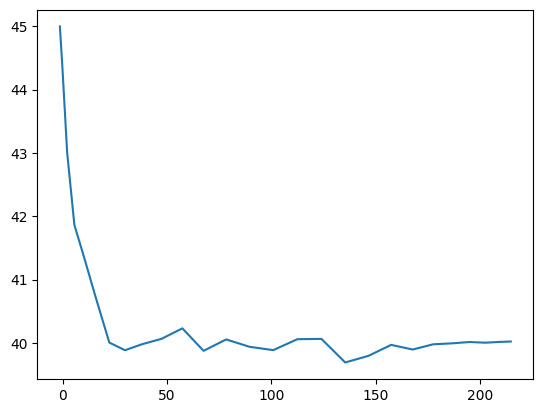

In [14]:
plt.plot(x_CO2_slice_avg_eroded[:27], p_CO2_slice_avg_eroded[:27])

In [15]:
# Levenberg-Marquardt algorithm for solving the nonlinear least-squares problem of fitting both models.

print("\n dilated")
print("O_2")
p_O2_slice_avg_dilated_fit_scipy, p1 = fit_model(reg_model_O2, x_O2_slice_avg_dilated[:23], p_O2_slice_avg_dilated[:23], p0 = [100,-0.01])
print("CO_2")
p_CO2_slice_avg_dilated_fit_scipy, q1  = fit_model(reg_model_CO2, x_CO2_slice_avg_dilated[:26], p_CO2_slice_avg_dilated[:26])
print("\n normal")
print("O_2")
p_O2_slice_avg_normal_fit_scipy, p2 = fit_model(reg_model_O2, x_O2_slice_avg_normal[:28], p_O2_slice_avg_normal[:28], p0 = p1)
print("CO_2")
p_CO2_slice_avg_normal_fit_scipy, q2 = fit_model(reg_model_CO2, x_CO2_slice_avg_normal[:28], p_CO2_slice_avg_normal[:28], p0 = q1)
print("\n eroded")
print("O_2")
p_O2_slice_avg_eroded_fit_scipy, p3 = fit_model(reg_model_O2, x_O2_slice_avg_eroded[:27], p_O2_slice_avg_eroded[:27], p0 = p2)
print("CO_2")
p_CO2_slice_avg_eroded_fit_scipy, q3 = fit_model(reg_model_CO2, x_CO2_slice_avg_eroded[:27], p_CO2_slice_avg_eroded[:27], p0 = q2)


 dilated
O_2
Optimal parameters: [ 1.07909063e+02 -5.58280655e-02]
Condition number: 78288.85829678929
Self correlations: [1.06680648e+01 2.14212198e-04]
Error = 2648.6029980872336
CO_2
Optimal parameters: [39.50843377 62.46343482 12.13456013]
Condition number: 32764.26270654097
Self correlations: [7.84864255e-03 6.24780130e+01 2.62537556e+00]
Error = 1.1886269131381488

 normal
O_2
Optimal parameters: [ 1.01967352e+02 -8.36317776e-02]
Condition number: 15506.774186591012
Self correlations: [1.52471427e+00 1.24877526e-04]
Error = 740.805723260502
CO_2
Optimal parameters: [39.69296857 32.64867657  7.15514525]
Condition number: 7740.763294005594
Self correlations: [3.88102666e-03 1.18557084e+01 4.66004108e-01]
Error = 1.1213845340953181

 eroded
O_2
Optimal parameters: [99.02212998 -0.15088321]
Condition number: 2943.713120492758
Self correlations: [8.82482349e-01 3.48790725e-04]
Error = 449.62642074138705
CO_2
Optimal parameters: [39.72235193 23.49190489  5.50015717]
Condition number: 

In [16]:
# Fitting

# NumPy polyval
n = 2

p_O2_slice_avg_dilated_fit_numpy = np.polyval(np.polyfit(x_O2_slice_avg_dilated[:23], p_O2_slice_avg_dilated[:23], n), np.arange(225))
p_CO2_slice_avg_dilated_fit_numpy = np.polyval(np.polyfit(x_CO2_slice_avg_dilated[:26], p_CO2_slice_avg_dilated[:26], n), np.arange(225))

p_O2_slice_avg_normal_fit_numpy = np.polyval(np.polyfit(x_O2_slice_avg_normal[:28], p_O2_slice_avg_normal[:28], n), np.arange(225))
p_CO2_slice_avg_normal_fit_numpy = np.polyval(np.polyfit(x_CO2_slice_avg_normal[:28], p_CO2_slice_avg_normal[:28], n), np.arange(225))

p_O2_slice_avg_eroded_fit_numpy = np.polyval(np.polyfit(x_O2_slice_avg_eroded[:27], p_O2_slice_avg_eroded[:27], n), np.arange(225))
p_CO2_slice_avg_eroded_fit_numpy = np.polyval(np.polyfit(x_CO2_slice_avg_eroded[:27], p_CO2_slice_avg_eroded[:27], n), np.arange(225))

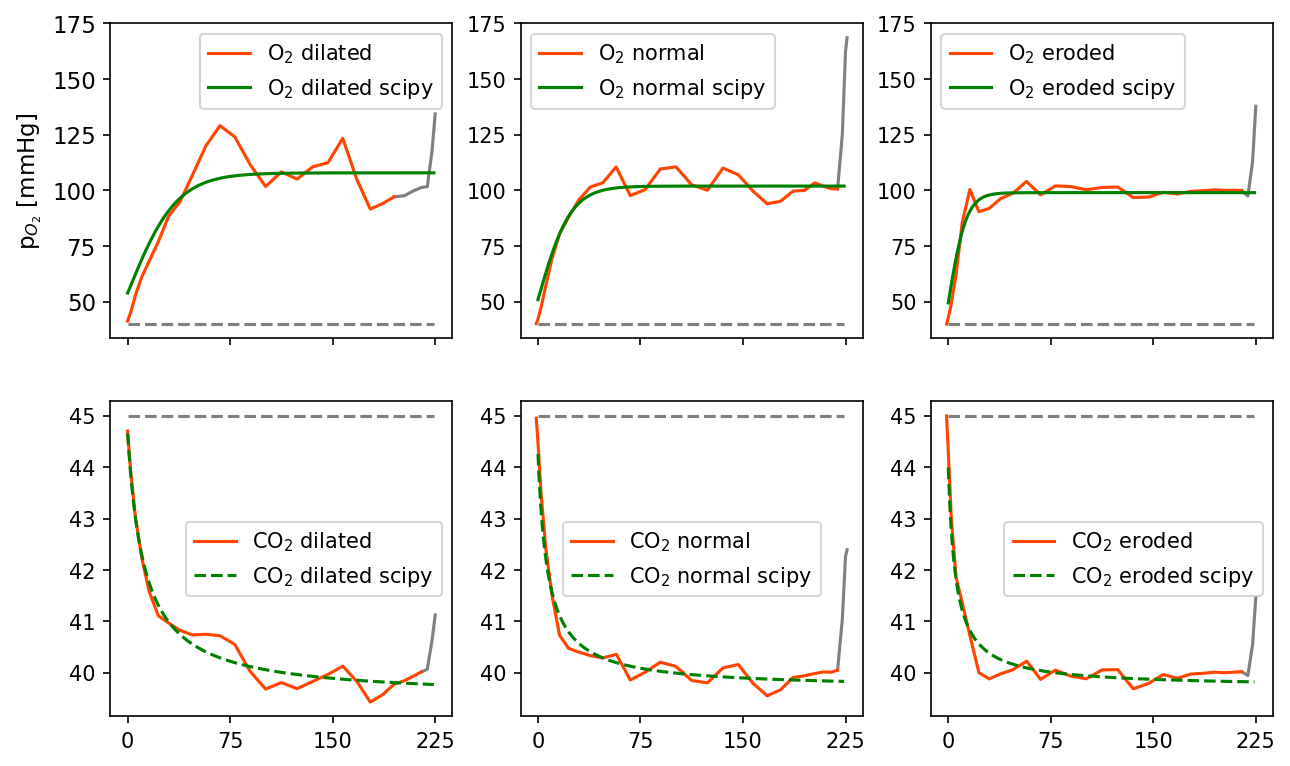

In [17]:
fig, axs = plt.subplots(2,3, figsize=(10,6), dpi=150, sharex=True, sharey='row')

t = 23
axs[0,0].plot(x_O2_slice_avg_dilated[t-1:], p_O2_slice_avg_dilated[t-1:], color='gray')
axs[0,0].plot(x_O2_slice_avg_dilated[:t], p_O2_slice_avg_dilated[:t], color='orangered', label=r'O$_2$ dilated')
axs[0,0].plot(np.arange(225), p_O2_slice_avg_dilated_fit_scipy, color='green', label=r'O$_2$ dilated scipy')
axs[0,0].plot(np.arange(225), 40*np.ones(225), '--', color='gray')
# axs[0,0].set_xlabel(r"Capillary length [$\mu$m]", size=11)

axs[0,0].set_ylabel(r"p$_{O_2}$ [mmHg]", size=11)
axs[0,0].tick_params(axis='both', labelsize=11)
axs[0,0].set_xticks([0,75,150,225])
axs[0,0].legend()

t = 28
axs[0,1].plot(x_O2_slice_avg_normal[t-1:], p_O2_slice_avg_normal[t-1:], color='gray')
axs[0,1].plot(x_O2_slice_avg_normal[:t], p_O2_slice_avg_normal[:t], color='orangered', label=r'O$_2$ normal')
# axs[0,0].plot(np.arange(225), p_O2_slice_avg_normal_fit_numpy, color='dodgerblue', label=r'O$_2$ normal numpy')
axs[0,1].plot(np.arange(225), p_O2_slice_avg_normal_fit_scipy, color='green', label=r'O$_2$ normal scipy')
axs[0,1].plot(np.arange(225), 40*np.ones(225), '--', color='gray')
# axs[0,1].set_xlabel(r"Capillary length [$\mu$m]", size=13)
# axs[0,1].set_ylabel(r"p$_{O_2}$ [mmHg]", size=13)
# axs[0,1].tick_params(axis='both', labelsize=13)
axs[0,1].yaxis.set_tick_params(labelbottom=True)
axs[0,1].set_xticks([0,75,150,225])
axs[0,1].legend()

t = 27
axs[0,2].plot(x_O2_slice_avg_eroded[t-1:], p_O2_slice_avg_eroded[t-1:], color='gray')
axs[0,2].plot(x_O2_slice_avg_eroded[:t], p_O2_slice_avg_eroded[:t], color='orangered', label=r'O$_2$ eroded')
# axs[0,2].plot(np.arange(225), p_O2_slice_avg_eroded_fit_numpy, color='dodgerblue', label=r'O$_2$ eroded numpy')
axs[0,2].plot(np.arange(225), p_O2_slice_avg_eroded_fit_scipy, color='green', label=r'O$_2$ eroded scipy')
axs[0,2].plot(np.arange(225), 40*np.ones(225), '--', color='gray')
# axs[0,2].set_xlabel(r"Capillary length [$\mu$m]", size=13)
# axs[0,2].set_ylabel(r"p$_{O_2}$ [mmHg]", size=13)
# axs[0,2].tick_params(axis='both', labelsize=13)
axs[0,2].yaxis.set_tick_params(labelbottom=True)
axs[0,2].set_xticks([0,75,150,225])
axs[0,2].legend()

t = 26
axs[1,0].plot(x_CO2_slice_avg_dilated[t-1:], p_CO2_slice_avg_dilated[t-1:], color='gray')
axs[1,0].plot(x_CO2_slice_avg_dilated[:t], p_CO2_slice_avg_dilated[:t], color='orangered', label=r'CO$_2$ dilated')
# axs[1,0].plot(np.arange(225), p_CO2_slice_avg_dilated_fit_numpy, '--', color='dodgerblue', label=r'CO$_2$ dilated')
axs[1,0].plot(np.arange(225), p_CO2_slice_avg_dilated_fit_scipy, '--', color='green', label=r'CO$_2$ dilated scipy')
axs[1,0].plot(np.arange(225), 45*np.ones(225), '--', color='gray')
# axs[1,0].set_xlabel(r"Capillary length [$\mu$m]", size=13)
# axs[1,0].set_ylabel(r"p$_{CO_2}$ [mmHg]", size=13)
# axs[1,0].tick_params(axis='both', labelsize=13)
axs[1,0].yaxis.set_tick_params(labelbottom=True)
axs[1,0].set_xticks([0,75,150,225])
axs[1,0].legend()

t = 28
axs[1,1].plot(x_CO2_slice_avg_normal[t-1:], p_CO2_slice_avg_normal[t-1:], color='gray')
axs[1,1].plot(x_CO2_slice_avg_normal[:t], p_CO2_slice_avg_normal[:t], color='orangered', label=r'CO$_2$ normal')
# axs[1,1].plot(np.arange(225), p_CO2_slice_avg_normal_fit_numpy, '--', color='dodgerblue', label=r'CO$_2$ normal')
axs[1,1].plot(np.arange(225), p_CO2_slice_avg_normal_fit_scipy, '--', color='green', label=r'CO$_2$ normal scipy')
axs[1,1].plot(np.arange(225), 45*np.ones(225), '--', color='gray')
# axs[1,1].set_xlabel(r"Capillary length [$\mu$m]", size=13)
# axs[1,1].set_ylabel(r"p$_{CO_2}$ [mmHg]", size=13)
# axs[1,1].tick_params(axis='both', labelsize=13)
axs[1,1].yaxis.set_tick_params(labelbottom=True)
axs[1,1].set_xticks([0,75,150,225])
axs[1,1].legend()

t = 27
axs[1,2].plot(x_CO2_slice_avg_eroded[t-1:], p_CO2_slice_avg_eroded[t-1:], color='gray')
axs[1,2].plot(x_CO2_slice_avg_eroded[:t], p_CO2_slice_avg_eroded[:t], color='orangered', label=r'CO$_2$ eroded')
# axs[1,2].plot(np.arange(225), p_CO2_slice_avg_eroded_fit_numpy, '--', color='dodgerblue', label=r'CO$_2$ eroded')
axs[1,2].plot(np.arange(225), p_CO2_slice_avg_eroded_fit_scipy, '--', color='green', label=r'CO$_2$ eroded scipy')
axs[1,2].plot(np.arange(225), 45*np.ones(225), '--', color='gray')
# axs[1,2].set_xlabel(r"Capillary length [$\mu$m]", size=13)
# axs[1,2].set_ylabel(r"p$_{CO_2}$ [mmHg]", size=13)
# axs[1,2].tick_params(axis='both', labelsize=13)
axs[1,2].yaxis.set_tick_params(labelbottom=True)
axs[1,2].set_xticks([0,75,150,225])
axs[1,2].legend()

plt.show()

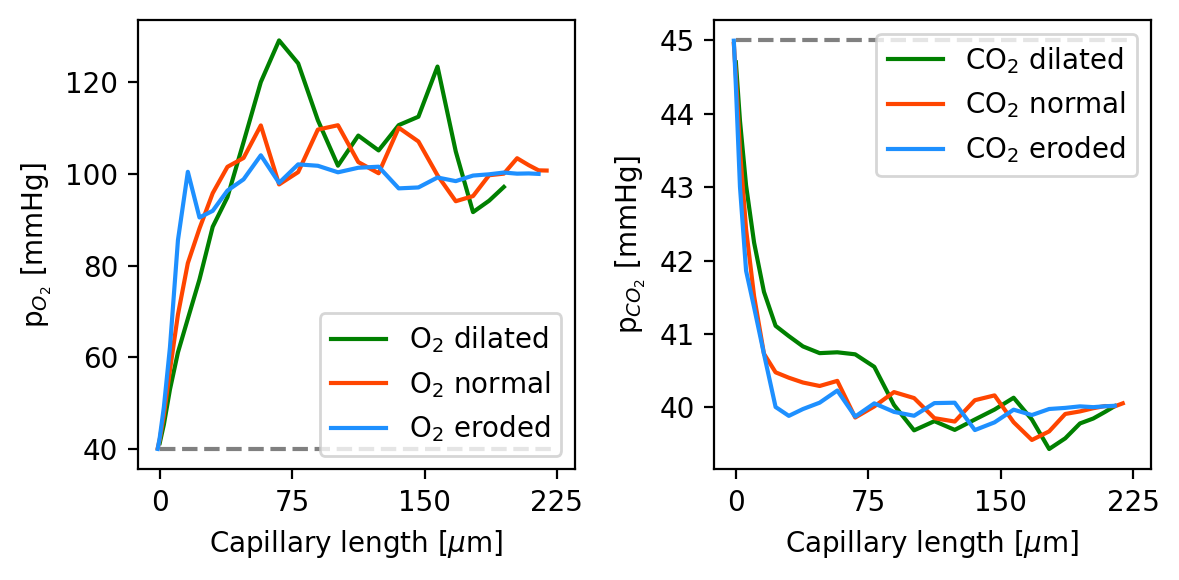

In [22]:
fig, axs = plt.subplots(1,2, figsize=(6,3), dpi=200, sharex=True)

axs[0].plot(x_O2_slice_avg_dilated[:23], p_O2_slice_avg_dilated[:23], color='green', label=r'O$_2$ dilated')
axs[0].plot(x_O2_slice_avg_normal[:28], p_O2_slice_avg_normal[:28], color='orangered', label=r'O$_2$ normal')
axs[0].plot(x_O2_slice_avg_eroded[:27], p_O2_slice_avg_eroded[:27], color='dodgerblue', label=r'O$_2$ eroded')
axs[0].plot(np.arange(225), 40*np.ones(225), '--', color='gray')
axs[0].set_xlabel(r"Capillary length [$\mu$m]") #, size=13
axs[0].set_ylabel(r"p$_{O_2}$ [mmHg]") #, size=13
axs[0].tick_params(axis='both') #, labelsize=13
axs[0].set_xticks([0,75,150,225])
axs[0].legend(loc="lower right")

axs[1].plot(x_CO2_slice_avg_dilated[:26], p_CO2_slice_avg_dilated[:26], color='green', label=r'CO$_2$ dilated')
axs[1].plot(x_CO2_slice_avg_normal[:28], p_CO2_slice_avg_normal[:28], color='orangered', label=r'CO$_2$ normal')
axs[1].plot(x_CO2_slice_avg_eroded[:27], p_CO2_slice_avg_eroded[:27], color='dodgerblue', label=r'CO$_2$ eroded')
axs[1].plot(np.arange(225), 45*np.ones(225), '--', color='gray')
axs[1].set_xlabel(r"Capillary length [$\mu$m]") #, size=13
axs[1].set_ylabel(r"p$_{CO_2}$ [mmHg]") #, size=13
axs[1].tick_params(axis='both') #, labelsize=13
axs[1].set_xticks([0,75,150,225])
axs[1].legend(loc='upper right')

fig.tight_layout()

plt.show()

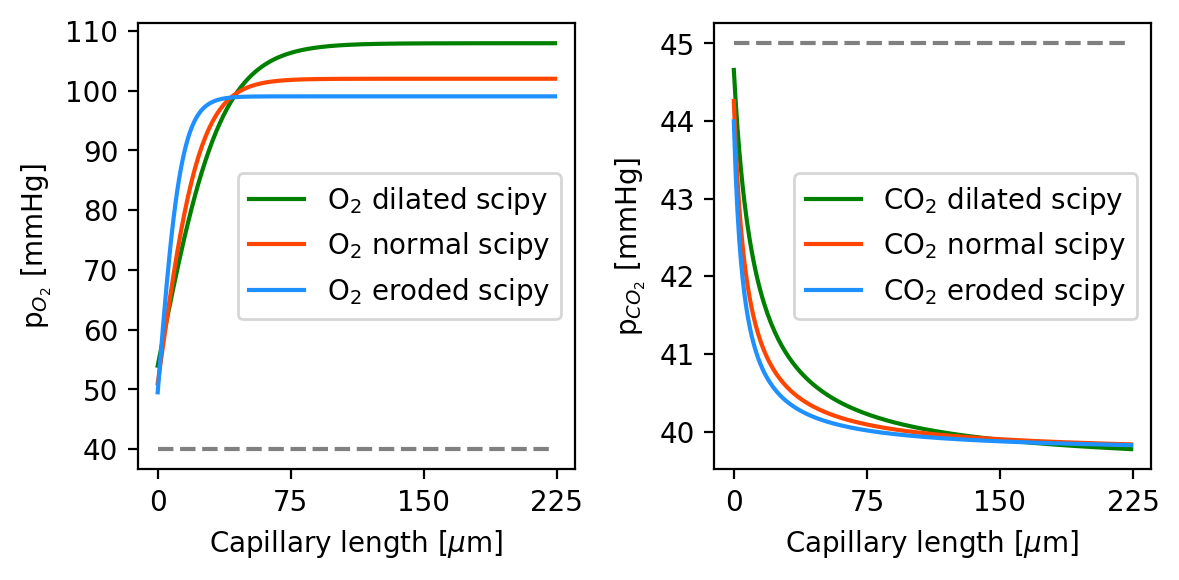

In [23]:
fig, axs = plt.subplots(1,2, figsize=(6,3), dpi=200, sharex=True)

axs[0].plot(np.arange(225), p_O2_slice_avg_dilated_fit_scipy, color='green', label=r'O$_2$ dilated scipy')
axs[0].plot(np.arange(225), p_O2_slice_avg_normal_fit_scipy, color='orangered', label=r'O$_2$ normal scipy')
axs[0].plot(np.arange(225), p_O2_slice_avg_eroded_fit_scipy, color='dodgerblue', label=r'O$_2$ eroded scipy')
axs[0].plot(np.arange(225), 40*np.ones(225), '--', color='gray')
axs[0].set_xlabel(r"Capillary length [$\mu$m]") #, size=13
axs[0].set_ylabel(r"p$_{O_2}$ [mmHg]") #, size=13
axs[0].tick_params(axis='both') #, labelsize=13
axs[0].set_xticks([0,75,150,225])
axs[0].legend()

axs[1].plot(np.arange(225), p_CO2_slice_avg_dilated_fit_scipy, color='green', label=r'CO$_2$ dilated scipy')
axs[1].plot(np.arange(225), p_CO2_slice_avg_normal_fit_scipy, color='orangered', label=r'CO$_2$ normal scipy')
axs[1].plot(np.arange(225), p_CO2_slice_avg_eroded_fit_scipy, color='dodgerblue', label=r'CO$_2$ eroded scipy')
axs[1].plot(np.arange(225), 45*np.ones(225), '--', color='gray')
axs[1].set_xlabel(r"Capillary length [$\mu$m]") #, size=13
axs[1].set_ylabel(r"p$_{CO_2}$ [mmHg]") #, size=13
axs[1].tick_params(axis='both') #, labelsize=13
axs[1].set_xticks([0,75,150,225])
axs[1].legend()


    


fig.tight_layout()

plt.show()